In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
dataset = pd.read_excel("../KPMG_VI_New_raw_data_update_final.xlsx",sheet_name="Transactions",header=1,index_col=0)

In [19]:
def plot_na_dataset(dataset):
    x = []
    y= []
    fig = plt.figure(figsize = (5,5))

    for col in dataset.columns:
        z = dataset[col].isna().sum()
        if z > 0:
            x.append(col[:10])
            y.append(z * 100 / dataset[col].count())

    plt.barh(x,y)
    plt.ylabel("Features")
    plt.xlabel("Missing Values %")

    plt.show()

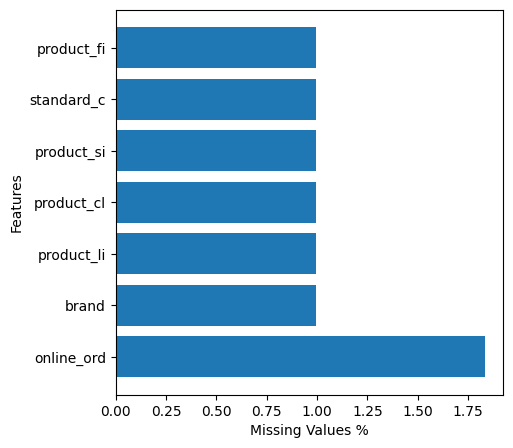

In [20]:
plot_na_dataset(dataset)

In [26]:
##low number of Nan values // easy to drop
dataset.dropna()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.880000,1991-08-07
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.960000,1996-11-11
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400000,2003-08-07
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,2003-07-23
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,2005-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...
2463,2,3500,2017-04-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.620000,2012-12-04
8416,74,3500,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.910000,2000-05-24
8708,0,5034,2017-10-07,0.0,Approved,Solex,Road,medium,medium,416.98,312.735016,2015-08-04


In [23]:
dataset = dataset.sort_values('customer_id')
dataset.head(5)

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0


In [24]:
### product_first_sold_date doesn't seem to be a date, Rather it is number of days added to 1990/1/1
## 41245 = 41245 days from 1990/1/1
import datetime as dt
dataset['product_first_sold_date'] = pd.TimedeltaIndex(dataset['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)
dataset.head(5)

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11


In [29]:
dataset["transaction_date"].max() - dataset["transaction_date"].min() 


Timedelta('363 days 00:00:00')

<AxesSubplot:title={'center':'No of transactions each month'}, xlabel='Month', ylabel='Counts'>

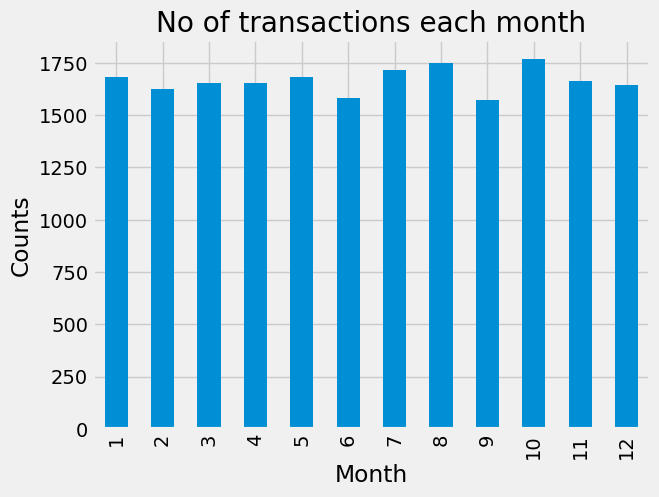

In [35]:

plt.style.use("fivethirtyeight")
dataset.groupby(dataset["transaction_date"].dt.month)["product_id"].count().plot(kind='bar',title="No of transactions each month",xlabel="Month",ylabel="Counts")


In [36]:
### Profit in each transactions
dataset["profit"] = dataset["list_price"] - dataset['standard_cost']

In [42]:
dataset.head(11)

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
transaction_id,,,,,,,,,,,,,
14486,23,1,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,1991-08-07,75.75
18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1996-11-11,509.97
16423,9,1,2017-12-09,1.0,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,2003-08-07,75.14
5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-23,189.28
13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-11,17.87
94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-12,110.56
14931,31,1,2017-12-14,1.0,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,2002-03-24,57.73
3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-21,751.02
9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-11,90.10


In [44]:
dataset["order_status"].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [46]:
dataset["product_class"].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [101]:
dataset["product_size"].value_counts().index.to_list()

['medium', 'large', 'small']

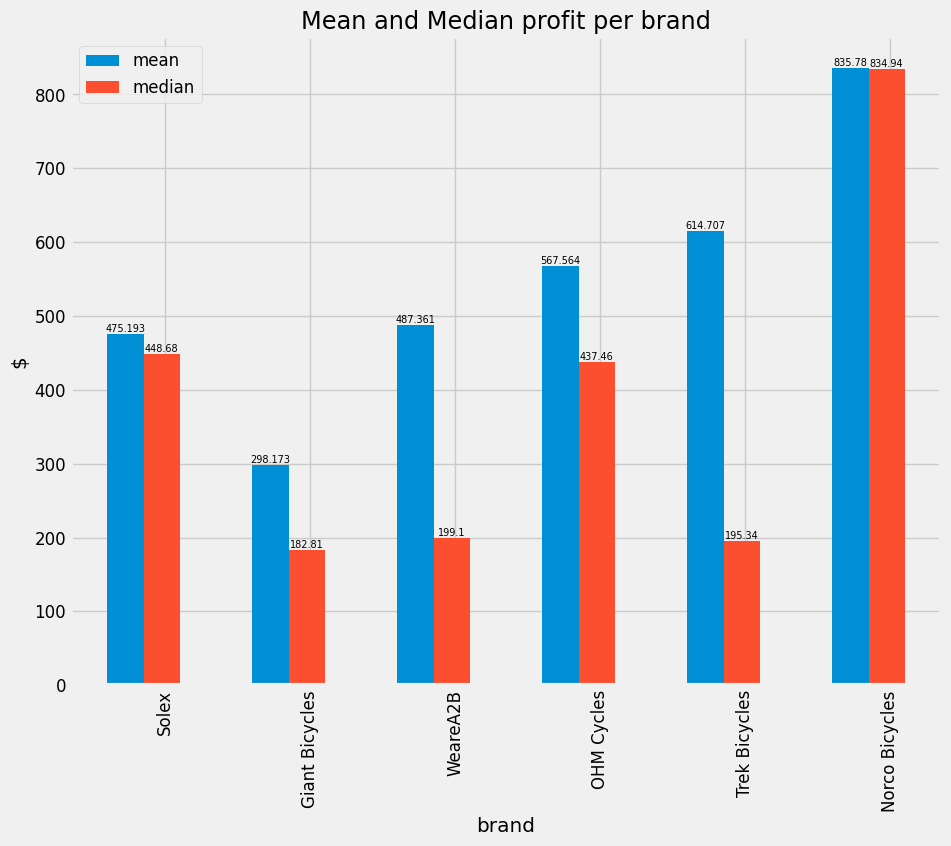

In [128]:
ls = dataset["brand"].value_counts().index.to_list()
x = np.arange(len(ls))
width = 0.15
ax = dataset.groupby(["brand"])["profit"].agg(['mean','median']).plot(kind='bar',title="Mean and Median profit per brand",figsize=(10,8))
ax.set_ylabel('$')
ax.set_xticks(x+width, ls)
for container in ax.containers:
    ax.bar_label(container,fontsize=7)
plt.rc('font',size=12)
plt.show()

In [134]:
def format_numbers(data_value,indx):
    if data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.000_001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter

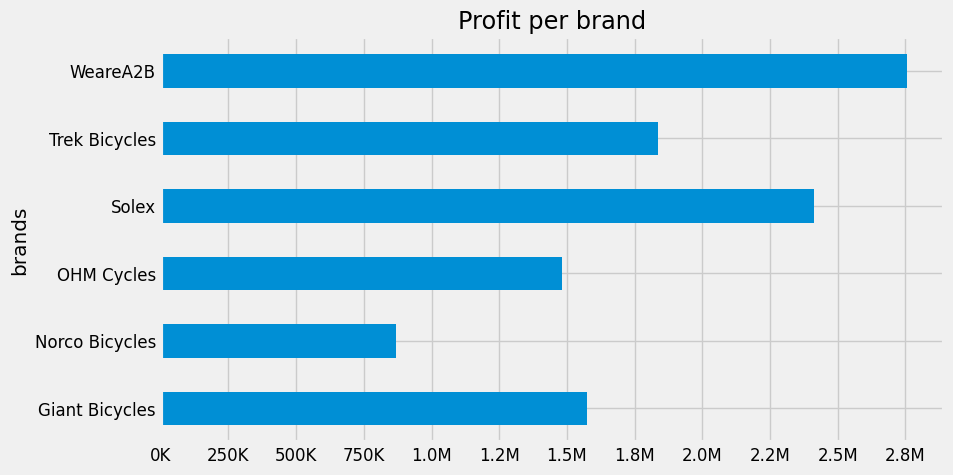

In [137]:

ax = dataset.groupby(["brand"])["profit"].agg(['sum','mean'])['sum'].plot(kind='barh',title="Profit per brand",xlabel='brands',figsize=(9,5))
plt.xticks(np.arange(0,3000000,250000))
ax.xaxis.set_major_formatter(format_numbers)

In [140]:
dataset['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64